Savin, Nikitina, Dubenskiy

Romanenko project

<font color="green"> 1.1 and 1.2 are done here </font>

<span style="color:black; font-size: 12pt"></span>


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# don't forget to upload utils file to the colab session
import warnings

warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
pd.options.plotting.backend = "plotly"

import warnings
warnings.filterwarnings('ignore')

# # setting of the plotting style, registers pandas date converters for matplotlib and the default figure size
# import seaborn as sns
# sns.set_style("darkgrid")
# pd.plotting.register_matplotlib_converters()
# # Default figure size
# sns.mpl.rc("figure", figsize=(25, 5))
# sns.mpl.rc("font", size=14)

# I. Building Time Series Forecastability Index
Those Time Series that have about the same accuracy level should have the same $\color{red}{Forecastability~Index}$.



<img src = 'https://github.com/aromanenko/ATSF/blob/main/pic/Forecastability%20Index.png?raw=true' width = 500pt>

Forecastability index = Function_of_DemandPatterns(Velocity, Variability, Trend, Seasonality, Intermittency) x Horizon

If there is a set of time series, forecastablity index may be presented as table with columns


|FI| No of ts| Demand share|  


Goal of the project: build forecastablity index for particular set

https://www.kaggle.com/t/216ccba5311a44d8a6a8998534523cf7

## Steps to build FI
### 1. Generate segments for each attributes
 - 1.1. Demand Volume (3-groups) - see II.1 and II.2 below
 - 1.2. Demand Variability (volatility coefficient) (3 groups) see II.1 and II. 3 below
 - 1.3. Seasonality (0/1) see https://github.com/aromanenko/ts-segmentation/blob/main/timeseries_segmentation.py
 - 1.4. Trend (0/1) see https://github.com/aromanenko/ts-segmentation/blob/main/timeseries_segmentation.py
 - 1.5. Intermittency (0/1) https://github.com/aromanenko/ts-segmentation/blob/main/timeseries_segmentation.py

### 2. Define benchmark forecastability for eash 5-dim cell from 1
 - 2.1. Use naive forecast to generate forecast for each ts,  see https://github.com/aromanenko/ts-segmentation/blob/main/timeseries_forecasting.py
 - 2.2. Calculate WAPE metic for each 5-dim cell, see https://github.com/aromanenko/ATSF/blob/main/7_Loss%20Functions%20in%20Forecasting.ipynb
 - 2.3. Order all 5-dim cells on WAPE metric (see example below)

### 3. Aggregate 5-dim cells to clusters with similar forecastability
 - use abc-analysis, see II.1 below

In [7]:
# example of 2.3 step
import itertools

## cortesian product of all segments
fi_segments = [
   [1, 100, 1000],
   [0.1, 0.8, 2],
   [0, 1],
   [0, 1],
   [0, 1]
   ]

# table with all fi cells
fi_cells = pd.DataFrame([element for element in itertools.product(*fi_segments)], columns = ['Demand Volume', 'Demand Variability', 'Seasonality', 'Trend', 'Intermittency'])
fi_cells['WAPE'] = [np.random.random() for i in fi_cells.index] # fake WAPE generation, just for example, you have to calculate real WAPE at 2.2. step
fi_cells['WAPE_ci_l'] = fi_cells['WAPE']-0.1  # fake WAPE lower-ci generation, just for example, you have to calculate real WAPE ci at 2.2. step
fi_cells['WAPE_ci_u'] = fi_cells['WAPE']+0.1  # fake WAPE upper_ci generation, just for example, you have to calculate real WAPE ci at 2.2. step
fi_cells = fi_cells.sort_values(by = 'WAPE')

# draw CI plot example
x = tuple(range(0,fi_cells.shape[0]))
y = tuple(fi_cells.WAPE_ci_u.values)+tuple(fi_cells.WAPE_ci_l.values[::-1]) # upper, then lower reversed


# some plotly hints to make picture readable
fig = go.Figure([
    go.Scatter(
        x=x,
        y=fi_cells.WAPE,
        line=dict(color='rgb(0,100,80)'),
        mode='lines',
        text=['Demand volume {0}<br>Demand variable {1}<br>Seasonality {2}<br>Trend {3}<br>Intermittency {4}'.\
              format(x[1]['Demand Volume'], x[1]['Demand Variability'], x[1]['Seasonality'], x[1]['Trend'], x[1]['Intermittency'])
              for x in fi_cells.iterrows()],
        name='WAPE',
    ),
    go.Scatter(
        x=x+x[::-1], # x, then x reversed
        y=y ,
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=True,
        text=fi_cells['Demand Volume'],
        name = 'WAPE_ci'
    )
])
fig.update_layout(
    title=dict(
        text="Foreastability Index plot"
    ),
    xaxis=dict(
        title=dict(
            text="5-dim cell"
        )
    ),
    yaxis=dict(
        title=dict(
            text="WAPE"
        )
    ))

fig.show()

# II. Some theory

## 1. ABC analysis

In [8]:
!pip install abc_analysis

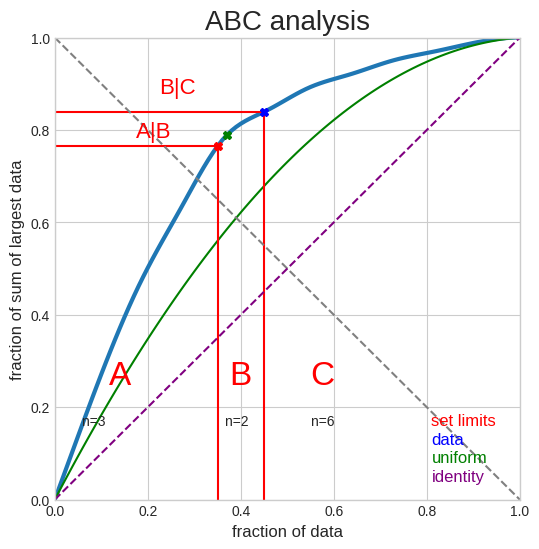

In [9]:
import abc_analysis
from abc_analysis import abc_analysis, abc_plot

# Perform an ABC analysis with plotting
dctAnalysis = abc_analysis([1, 15, 25, 17, 2, 3, 5, 6, 2, 3, 22], True)

## 2. Demand Volume segments (example)

<font color="red"> заменить данные в ячейке на те, что указаны в проекте</font>

Done

In [10]:
# Загрузка датасета по магазинам
import pandas as pd
import numpy as np

ts_retail = pd.read_csv('STORE_LOCATION.csv', sep=';')

# Переводим дату открытия магазина в datetime
ts_retail['STORE_OPEN_DTTM'] = pd.to_datetime(
    ts_retail['STORE_OPEN_DTTM'],
    format='%d%b%Y:%H:%M:%S',
    errors='coerce'
)

# Делаем колонку Date по дате открытия (без времени)
ts_retail['Date'] = ts_retail['STORE_OPEN_DTTM'].dt.normalize()

# Убираем строки без корректной даты и ставим её индексом
ts_retail = ts_retail[ts_retail['Date'].notna()]
ts_retail.set_index('Date', inplace=True)

# Числовой показатель, с которым будем работать вместо Demand:
# "возраст магазина" в днях на текущую дату
reference_date = pd.Timestamp.today().normalize()
ts_retail['store_age_days'] = (reference_date - ts_retail.index).days

# Идентификаторы "серий" – возьмём два уровня иерархии локаций
ts_id_columns = ['STORE_LOCATION_LVL_RK4', 'STORE_LOCATION_LVL_RK2']

ts_retail.head()


,STORE_LOCATION_RK,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,STORE_LOCATION_ADK_hashing,STORE_LOCATION_ATTRIB1_hashing,STORE_LOCATION_ATTRIB2_hashing,...,STORE_LOCATION_ATTRIB13_hashing,STORE_LOCATION_ATTRIB14_hashing,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing,store_age_days
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-15,277,124,124,19,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828
2018-03-15,278,124,124,19,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,0A7D98B3F3BA0A5BC89F693FB146FE40,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828
2018-03-15,279,183,183,20,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,6BA1D912365C006B003750C17E810A8C,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828
2018-03-15,280,211,211,12,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828
2018-03-15,281,221,221,3,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,17AC9AE74D16FBC665FFB4CFC2DF24F5,B70EA5F8E1DD1E21F7485AADD433620F,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828


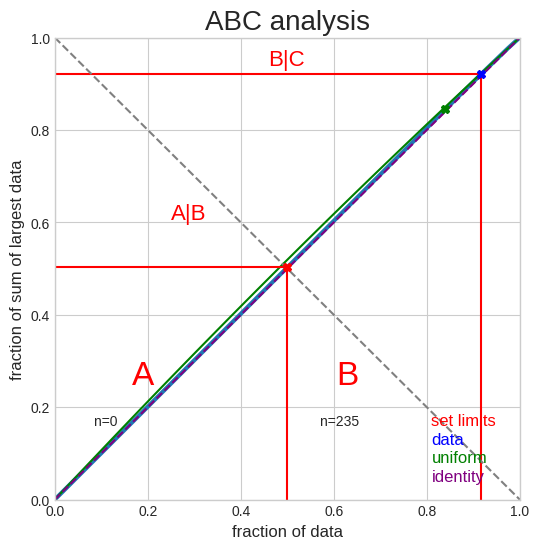

,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK2,mean_store_age,volume_group
0,23,4,2828.000000,Medium volume (B)
1,24,11,2719.166667,Low volume (C)
2,25,10,2828.000000,Medium volume (B)
3,26,10,2828.000000,Medium volume (B)
4,27,5,2828.000000,Medium volume (B)


volume_group
Medium volume (B)    235
Low volume (C)        21
Name: count, dtype: int64


In [11]:
# 1.1

# считаем средний возраст магазина по каждой паре ts_id_columns
volume = (
    ts_retail
    .groupby(ts_id_columns)['store_age_days']
    .mean()                               # средний возраст
    .reset_index(name='mean_store_age')
)

# ABC-анализ со сплайнами и автоматическими границами
abc_vol = abc_analysis(volume['mean_store_age'].fillna(0).values, True)

# индексы элементов в классах A/B/C (возвращаются самой библиотекой)
a_idx = abc_vol['Aind']
b_idx = abc_vol['Bind']
c_idx = abc_vol['Cind']

# создаём колонку с группой по "объёму" (здесь – по среднему возрасту)
volume['volume_group'] = None
volume.loc[a_idx, 'volume_group'] = 'High volume (A)'
volume.loc[b_idx, 'volume_group'] = 'Medium volume (B)'
volume.loc[c_idx, 'volume_group'] = 'Low volume (C)'

display(volume.head())
print(volume['volume_group'].value_counts())


In [12]:
# присоединяем группы "объёма" к исходным данным
ts_retail = ts_retail.merge(
    volume[ts_id_columns + ['mean_store_age', 'volume_group']],
    on=ts_id_columns,
    how='left'
)

ts_retail.head()


,STORE_LOCATION_RK,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,STORE_LOCATION_ADK_hashing,STORE_LOCATION_ATTRIB1_hashing,STORE_LOCATION_ATTRIB2_hashing,...,STORE_LOCATION_ATTRIB15_hashing,STORE_LOCATION_ATTRIB16_hashing,STORE_LOCATION_ATTRIB17_hashing,STORE_LOCATION_ATTRIB18_hashing,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing,store_age_days,mean_store_age,volume_group
0,277,124,124,19,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828,2793.980000,Medium volume (B)
1,278,124,124,19,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,0A7D98B3F3BA0A5BC89F693FB146FE40,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828,2793.980000,Medium volume (B)
2,279,183,183,20,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828,2782.250000,Medium volume (B)
3,280,211,211,12,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828,2804.815385,Medium volume (B)
4,281,221,221,3,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,FC5FD090934CE685C1C12E5E0311F1D4,3F0DA22658EF921D0F500BFDC5471DB3,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828,2785.400000,Medium volume (B)


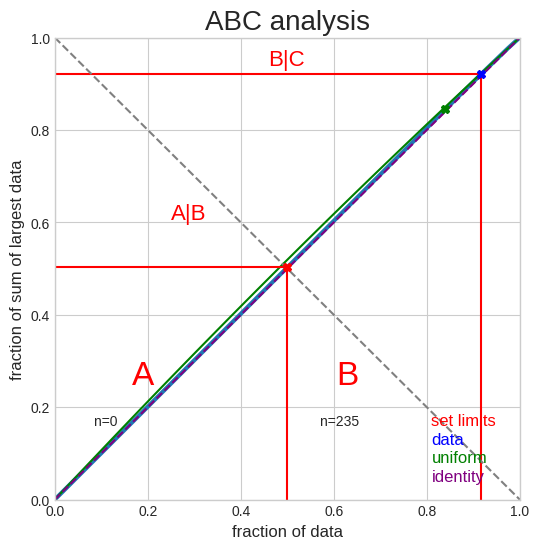

In [13]:
# split TS by "volume" (средний возраст)
ts_mean_values = ts_retail.groupby(ts_id_columns)['store_age_days'].mean()

# Plot saved results of an ABC analysis
ts_demand_abc  = abc_analysis(ts_mean_values.fillna(0), True)


## 3. Demand Variability Segments (example)

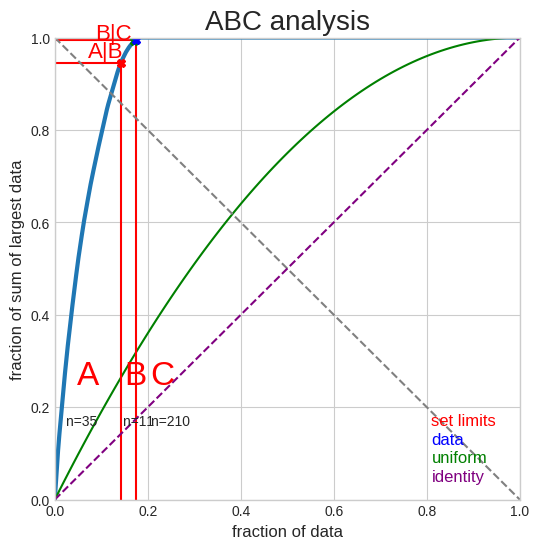

In [14]:
# split TS by Coefficient of Volatility (CV)

# стандартное отклонение / среднее
ts_cv_values = ts_retail.groupby(ts_id_columns)['store_age_days'].std().div(
    ts_retail.groupby(ts_id_columns)['store_age_days'].mean().fillna(1)
)

# Plot saved results of an ABC analysis
ts_demand_abc  = abc_analysis(ts_cv_values.fillna(0), True)


<font color="red"> Review </font>

I. Почему используете примитивный подход 80% и 95%?
Специально выше показываю, как применять продвинутый подход через проивзодную (сплайны) выше! Он лучше работает в общем случае:
 Нужно переделать через подход выше!

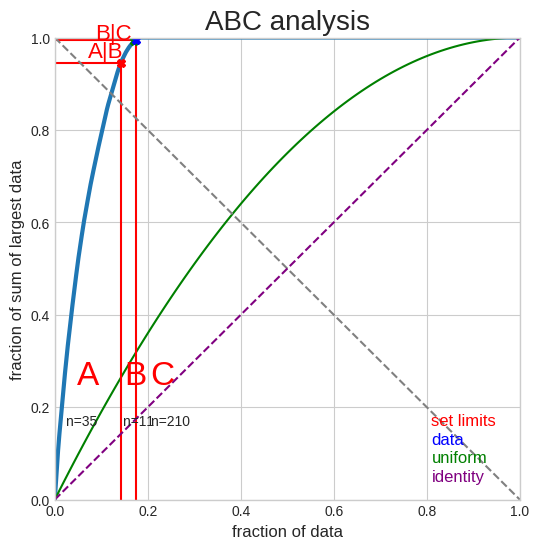

,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK2,mean_store_age,std_store_age,cv,variability_group
0,23,4,2828.000000,0.000000,0.00000,Low variability (C)
1,24,11,2719.166667,266.586134,0.09804,High variability (A)
2,25,10,2828.000000,NaN,0.00000,Low variability (C)
3,26,10,2828.000000,0.000000,0.00000,Low variability (C)
4,27,5,2828.000000,NaN,0.00000,Low variability (C)


variability_group
Low variability (C)       210
High variability (A)       35
Medium variability (B)     11
Name: count, dtype: int64


In [15]:
# 1.2

# считаем средний "спрос" (у нас это возраст магазина) и стандартное отклонение
stats = (
    ts_retail
    .groupby(ts_id_columns)['store_age_days']
    .agg(mean_store_age='mean', std_store_age='std')
    .reset_index()
)

# коэффициент вариации
stats['cv'] = stats['std_store_age'] / stats['mean_store_age']

# обработка бесконечностей и NaN
stats['cv'] = stats['cv'].replace([np.inf, -np.inf], np.nan)
stats['cv'] = stats['cv'].fillna(0)

# ABC-анализ по CV (сплайны, автоматические границы)
abc_var = abc_analysis(stats['cv'].values, True)

a_idx = abc_var['Aind']   # самые "важные" по CV — наибольшая вариативность
b_idx = abc_var['Bind']
c_idx = abc_var['Cind']

stats['variability_group'] = None
stats.loc[a_idx, 'variability_group'] = 'High variability (A)'
stats.loc[b_idx, 'variability_group'] = 'Medium variability (B)'
stats.loc[c_idx, 'variability_group'] = 'Low variability (C)'

display(stats.head())
print(stats['variability_group'].value_counts())


In [16]:
# присоединяем признаки вариативности к данным
ts_retail = ts_retail.merge(
    stats[ts_id_columns + ['mean_store_age', 'std_store_age', 'cv', 'variability_group']],
    on=ts_id_columns,
    how='left'
)

ts_retail.head()


,STORE_LOCATION_RK,STORE_LOCATION_LVL_RK4,STORE_LOCATION_LVL_RK3,STORE_LOCATION_LVL_RK2,STORE_LOCATION_LVL_RK1,STORE_OPEN_DTTM,STORE_CLOSURE_DTTM,STORE_LOCATION_ADK_hashing,STORE_LOCATION_ATTRIB1_hashing,STORE_LOCATION_ATTRIB2_hashing,...,STORE_LOCATION_ATTRIB19_hashing,STORE_LOCATION_ATTRIB20_hashing,STORE_LOCATION_ATTRIB21_hashing,store_age_days,mean_store_age_x,volume_group,mean_store_age_y,std_store_age,cv,variability_group
0,277,124,124,19,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828,2793.980000,Medium volume (B),2793.980000,117.768018,0.042151,High variability (A)
1,278,124,124,19,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828,2793.980000,Medium volume (B),2793.980000,117.768018,0.042151,High variability (A)
2,279,183,183,20,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828,2782.250000,Medium volume (B),2782.250000,91.500000,0.032887,High variability (A)
3,280,211,211,12,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828,2804.815385,Medium volume (B),2804.815385,84.168709,0.030009,High variability (A)
4,281,221,221,3,1,2018-03-15 14:08:08,01Jan5999:00:00:00,181F921CC957DF5CEC4BF2C18E4A371F,B4E5DABD7AF605C64E1CEF8BE96EDEF0,1B208496FEF79DB5BE9F374BF65865E6,...,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,FF83472786DB3B25D48ABD61502E1D91,2828,2785.400000,Medium volume (B),2785.400000,115.802665,0.041575,High variability (A)


## 4. Intermittent Demand Time Series model

$$ y_t = x_t\cdot z_t +\varepsilon_t$$

   - $x_t$ - random variable (1 or 0) to have non-zero actual value       
   - $z_t$ - actual volume


**Note:**
 - sometimes intermittent time series are classified to more classes https://frepple.com/blog/demand-classification/
 - don't confuse intermittent and highly-causal driven time series:
     -- we don't know time

### Croston Model
<img src = "https://github.com/aromanenko/ATSF/blob/main/pic/CrostonIdea.PNG?raw=true">

**Croston Algorithm for Time Series Forecasting**

$$ \hat{y}_{t+1}=\hat z_t/\hat{n}_t$$
where
$$ \hat z_t = \begin{cases}z_{t-1}, & y_t==0 \\ \alpha\cdot{y_t}+(1-\alpha) z_{t-1}, & y_t <>0 \end{cases}$$

$$ \hat{n}_t = \begin{cases}\hat{n}_t, & y_t==0 \\ \beta\cdot{\color{red}{n_t}}+(1-\beta) \hat{n}_{t-1}, & y_t <>0 \end{cases}$$

$\alpha$ - smoothing parameter for time level value
$\beta$ - smoothing parameter for 0-intervals length forecasting

<img src = "https://github.com/aromanenko/ATSF/blob/main/pic/CrostonIdea2.PNG?raw=true">


**Example of Realization**
- https://towardsdatascience.com/croston-forecast-model-for-intermittent-demand-360287a17f5f

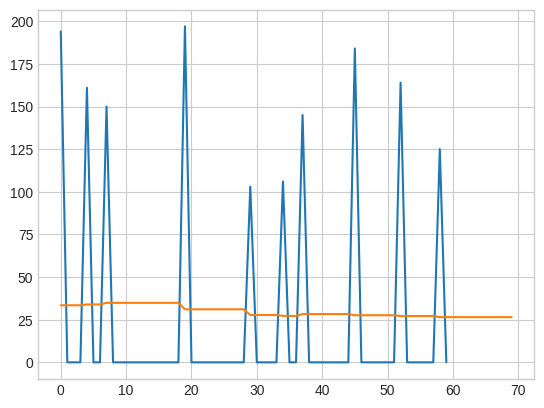

In [17]:
!pip install croston
from croston import croston
import random

a = np.zeros(50)
val = np.array(random.sample(range(100,200), 10))
idxs = random.sample(range(50), 10)

ts = np.insert(a, idxs, val)

fit_pred = croston.fit_croston(ts, 10,'original')

yhat = np.concatenate([fit_pred['croston_fittedvalues'], fit_pred['croston_forecast']])

plt.plot(ts)
plt.plot(yhat)


Times Series with intermittent-demand-pattern contains non-zero actual values in random time points (non-zero actual values occur occasionaly).


<img src = "https://github.com/aromanenko/ATSF/blob/main/pic/IntermittentExample.PNG?raw=true">
<img src = "https://github.com/aromanenko/ATSF/blob/main/pic/IntermittentExample2.PNG?raw=true">


======================== ABC ANALYSIS for store_age_days ========================



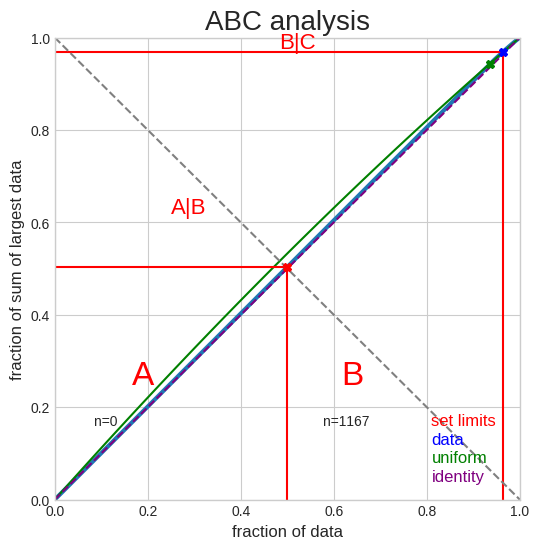

A: 0 элементов (0.0%)
B: 1167 элементов (96.6%)
C: 41 элементов (3.4%)

======================== ABC ANALYSIS for non_null_attrs ========================



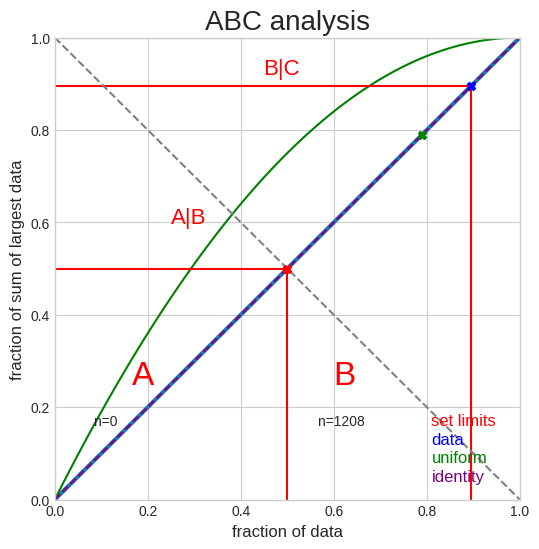

A: 0 элементов (0.0%)
B: 1208 элементов (100.0%)
C: 0 элементов (0.0%)

======================== ABC ANALYSIS for attribute_density ========================



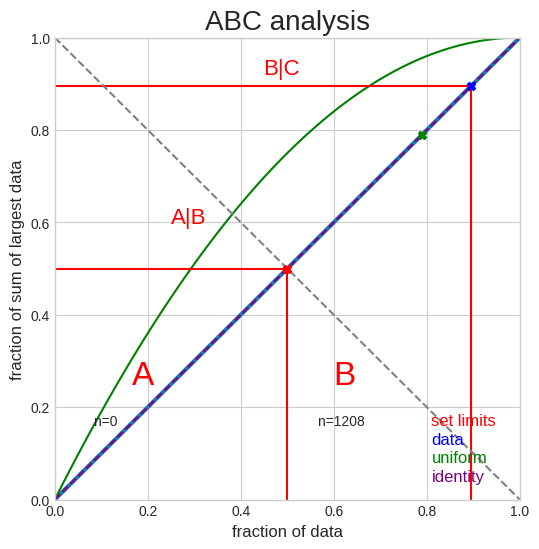

A: 0 элементов (0.0%)
B: 1208 элементов (100.0%)
C: 0 элементов (0.0%)

======================== ABC ANALYSIS for attr_entropy ========================



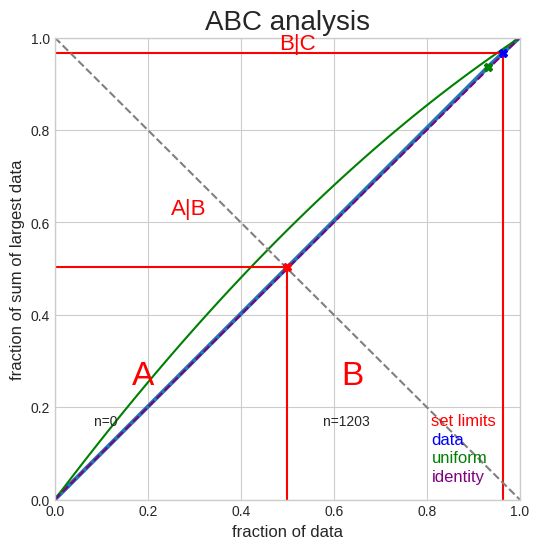

A: 0 элементов (0.0%)
B: 1203 элементов (99.6%)
C: 5 элементов (0.4%)

======================== ABC ANALYSIS for composite_index ========================



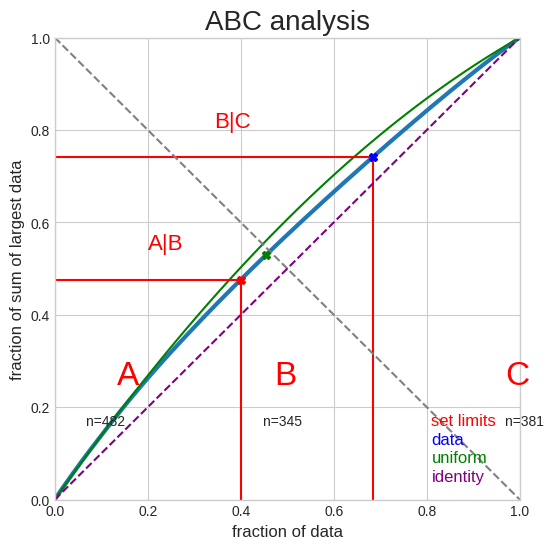

A: 482 элементов (39.9%)
B: 345 элементов (28.6%)
C: 381 элементов (31.5%)

======================== ABC ANALYSIS for location_weight ========================



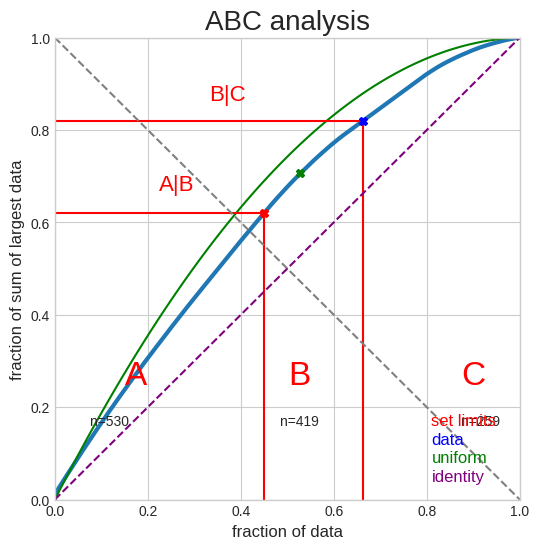

A: 530 элементов (43.9%)
B: 419 элементов (34.7%)
C: 259 элементов (21.4%)


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from abc_analysis import abc_analysis

# 1. Загрузка данных
df = pd.read_csv("STORE_LOCATION.csv", sep=';')

# 2. Даты и возраст магазина
df['STORE_OPEN_DTTM'] = pd.to_datetime(
    df['STORE_OPEN_DTTM'],
    format='%d%b%Y:%H:%M:%S',
    errors='coerce'
)

df['STORE_CLOSURE_DTTM'] = pd.to_datetime(
    df['STORE_CLOSURE_DTTM'],
    format='%d%b%Y:%H:%M:%S',
    errors='coerce'
)

ref_date = pd.Timestamp.today().normalize()
df['store_age_days'] = (ref_date - df['STORE_OPEN_DTTM']).dt.days

# 3. Метрики по атрибутам
attr_cols = [c for c in df.columns if 'ATTRIB' in c]

df['non_null_attrs'] = df[attr_cols].notna().sum(axis=1)       # сколько атрибутов заполнено
df['attribute_density'] = df[attr_cols].count(axis=1)          # то же самое, но через count
df['attr_entropy'] = df[attr_cols].nunique(axis=1)             # сколько уникальных значений в строке

# 4. Композитный индекс (кодируем строки в числа, потом нормируем)
code_cols = []
for col in attr_cols:
    code_col = col + "_code"
    df[code_col] = df[col].astype("category").cat.codes   # -1 для NaN
    code_cols.append(code_col)

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(
    df[code_cols].replace(-1, np.nan).fillna(0)
)

df['composite_index'] = df_scaled.mean(axis=1)

# 5. Взвешенный индекс локации
df['location_weight'] = (
    df['STORE_LOCATION_LVL_RK4'] * 1.0 +
    df['STORE_LOCATION_LVL_RK3'] * 0.5 +
    df['STORE_LOCATION_LVL_RK2'] * 0.2 +
    df['STORE_LOCATION_LVL_RK1'] * 0.1
)

# 6. ABC-анализ по всем метрикам
metrics = {
    'store_age_days': df['store_age_days'],
    'non_null_attrs': df['non_null_attrs'],
    'attribute_density': df['attribute_density'],
    'attr_entropy': df['attr_entropy'],
    'composite_index': df['composite_index'],
    'location_weight': df['location_weight']
}

abc_results = {}

for name, series in metrics.items():
    print(f"\n======================== ABC ANALYSIS for {name} ========================\n")

    s = series.fillna(0).values
    result = abc_analysis(s, True)   # строит график и считает группы A/B/C

    abc_results[name] = result

    A = len(result["Aind"])
    B = len(result["Bind"])
    C = len(result["Cind"])
    total = len(series)

    print(f"A: {A} элементов ({A/total:.1%})")
    print(f"B: {B} элементов ({B/total:.1%})")
    print(f"C: {C} элементов ({C/total:.1%})")
